# Cryptocurrencies Analysis

In [1]:
import pandas as pd
import pandas_datareader as reader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Prices and daily returns

In [19]:
crypto_list = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BNB-USD', 'XRP-USD']

In [20]:
start = dt.datetime(2017, 12, 31)
end = dt.datetime.now()

In [21]:
df = reader.get_data_yahoo(crypto_list,start,end)['Adj Close']

In [22]:
df

Symbols,BTC-USD,ETH-USD,LTC-USD,BNB-USD,XRP-USD
Date,,,,,
2017-12-31,14156.400391,756.732971,232.095993,8.635580,2.300570
2018-01-01,13657.200195,772.640991,229.033005,8.414610,2.391030
2018-01-02,14982.099609,884.443970,255.684006,8.837770,2.480900
2018-01-03,15201.000000,962.719971,245.367996,9.535880,3.105370
2018-01-04,15599.200195,980.921997,241.369995,9.213990,3.196630
...,...,...,...,...,...
2022-10-02,19044.107422,1276.093506,51.911633,284.433105,0.448850
2022-10-03,19623.580078,1323.439209,54.176208,287.031982,0.462879
2022-10-04,20336.843750,1362.126587,55.298462,296.298462,0.480174


In [23]:
daily_returns = df.pct_change().dropna(axis=0)
daily_returns

Symbols,BTC-USD,ETH-USD,LTC-USD,BNB-USD,XRP-USD
Date,,,,,
2018-01-01,-0.035263,0.021022,-0.013197,-0.025588,0.039321
2018-01-02,0.097011,0.144702,0.116363,0.050289,0.037586
2018-01-03,0.014611,0.088503,-0.040347,0.078992,0.251711
2018-01-04,0.026196,0.018907,-0.016294,-0.033756,0.029388
2018-01-05,0.117333,0.017125,0.032734,0.618973,-0.046274
...,...,...,...,...,...
2022-10-02,-0.013877,-0.027104,-0.018811,0.005519,-0.055271
2022-10-03,0.030428,0.037102,0.043624,0.009137,0.031255
2022-10-04,0.036347,0.029232,0.020715,0.032284,0.037364


In [24]:
daily_returns.describe()

Symbols,BTC-USD,ETH-USD,LTC-USD,BNB-USD,XRP-USD
count,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000
mean,0.000970,0.001631,0.000579,0.003716,0.000928
std,0.038911,0.050368,0.052998,0.059433,0.060825
min,-0.371695,-0.423472,-0.361773,-0.419046,-0.423340
25%,-0.015964,-0.022483,-0.026283,-0.022074,-0.023392
50%,0.001165,0.000812,-0.000149,0.000962,-0.001044
75%,0.017739,0.027267,0.026727,0.027659,0.020847
max,0.187465,0.259475,0.337221,0.697604,0.560109


## Charts

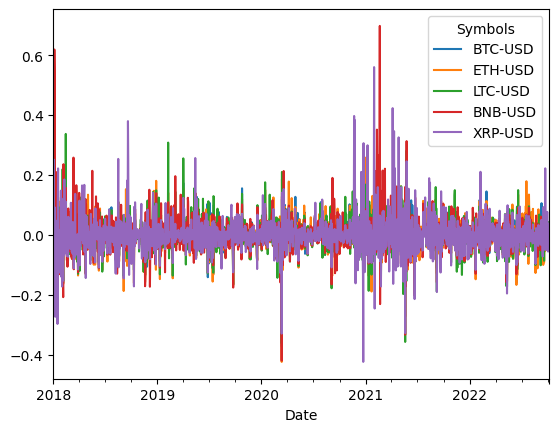

In [25]:
daily_returns.plot()
plt.show()

## Comparable methods

In [28]:
daily_return_cum = (daily_returns + 1).cumprod()-1
daily_return_cum

Symbols,BTC-USD,ETH-USD,LTC-USD,BNB-USD,XRP-USD
Date,,,,,
2018-01-01,-0.035263,0.021022,-0.013197,-0.025588,0.039321
2018-01-02,0.058327,0.168766,0.101630,0.023414,0.078385
2018-01-03,0.073790,0.272206,0.057183,0.104255,0.349826
2018-01-04,0.101919,0.296259,0.039958,0.066980,0.389495
2018-01-05,0.231210,0.318457,0.074000,0.727411,0.325198
...,...,...,...,...,...
2022-10-02,0.345265,0.686319,-0.776336,31.937348,-0.804896
2022-10-03,0.386198,0.748885,-0.766578,32.238298,-0.798798
2022-10-04,0.436583,0.800010,-0.761743,33.311356,-0.791280


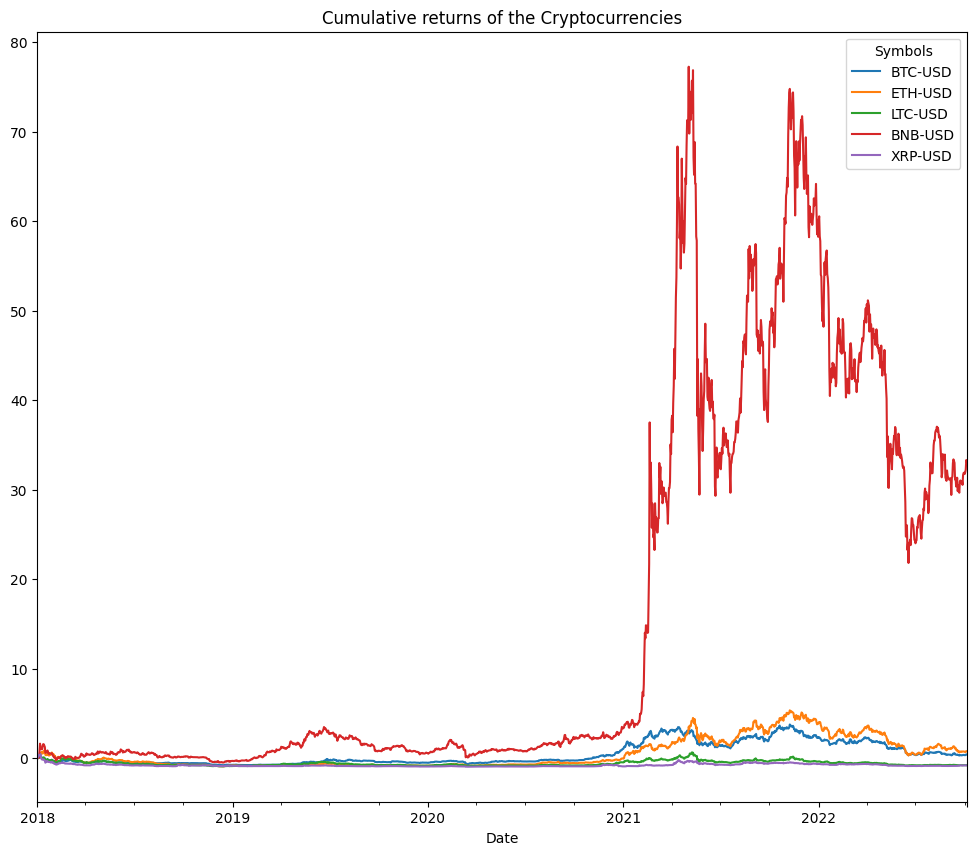

In [41]:

daily_return_cum.plot(figsize = (12, 10))
plt.title('Cumulative returns of the Cryptocurrencies')
plt.show()

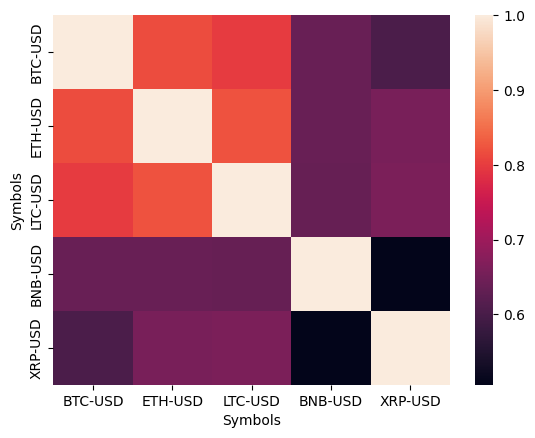

In [45]:
sns.heatmap(daily_returns.corr())
plt.show()